<a href="https://colab.research.google.com/github/leoalexandre/mvp_mach_learn/blob/main/mvp_pro_heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PUC-Rio**
# Pós Graduação em Ciências de Dados e Analytics
# Sprint: Machine Learning & Analytics
# Leonardo Alexandre

##**1.   Definição do Problema**



As doenças cardiovasculares são umas das principais causas de morte no mundo. "Estima-se que 17,9 milhões de pessoas morreram por doenças cardiovasculares em 2016, representando 31% de todas as mortes em nível global. Destes óbitos, estima-se que 85% ocorrem devido a ataques cardíacos e acidentes vasculares cerebrais (AVCs)."
O foco deste mvp é treinar modelos de machine learning para diagnosticar uma doença cardiáca caso exista.
O dataset foi retirado do site abaixo:

https://archive.ics.uci.edu/dataset/45/heart+disease

A partir de quatro conjuntos de dados (Cleveland, Hungary, Switzerland, e the VA Long Beach), foi construído um único dataset. Esse dataset consiste na junção dos quatro datasets citados anteriormente. Cada um destes dataset utiliza 14 atributos com dados de pacientes. Esses atributos são os mesmos que foram pré-selecionados e disponibilizados no banco de dados pelo próprio site da UCI.

Informação sobre atributos:

  1. **Age** - idade
  2. **Sex** - sexo (1 = homem; 0 = mulher)
  3. **cp** - tipo de dor no peito

      *Valor 1* : angina típica

      *Valor 2* : angina atípica

      *Valor 3* : dor não anginosa

      *Valor 4* : assintomático

  4. **trestbps** - tensão arterial em repouso (em mm/Hg)
  5. **chol** - colesterol sérico em mg/dl
  6. **fbs** - glicemia em jejum > 120 mg/dl
  
      *Valor 1* : verdadeiro

      *Valor 0* : falso

  7. **restecg** - resultados electrocardiográficos em repouso

      *Valor 0* : normal

      *Valor 1* : com anomalia da onda ST-T (T inversões de onda e/ou elevação ou depressão de ST > 0.05 mV)

      *Valor 2* : com provável ou definitiva hipertrofia ventricular esquerda

  8. **thalach** - frequência cardíaca máxima atingida
  9. **exang** - angina induzida pelo exercício

       *Valor 1* : sim

       *Valor 0* : não

  10. **oldpeak** - Depressão ST induzida pelo exercício comparado ao repouso
  11. **slope** - a inclinação do segmento ST de pico do exercício

         *Valor 1* : ascendente

         *Valor 2* : reto

         *Valor 3* : descendente

  12. **ca** - número de vasos principais coloridos por fluroscopia (0-3)
  13. **thal** - 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
  14. **num** - diagnóstico de doença cardíaca a partir do estado angiográfico da doença

      0 : Sem doença cardíaca; paciente saudável

      1-4 : Presença de doença cardíaca

      1 : Doença cardíaca leve

      2 : Doença cardíaca ligeiramente grave

      3 : Doença muito grave

      4 : Doença cardíaca possivelmente fatal

A seguir faremos os imports necessários das bibliotecas python e também o import do dataset que será trabalhado.

In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos
from sklearn.metrics import confusion_matrix # para fazer matriz de confusão
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.model_selection import GridSearchCV # para ajustar paramêtros automaticamente do modelo
from sklearn.metrics import accuracy_score # para exibição da acurácia do modelo
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier # Algoritmo de KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVR # Algoritmo de SVM
from sklearn.preprocessing import StandardScaler # função de pre processamento para padronizar
from sklearn.preprocessing import MinMaxScaler # função de pre processamento para normalizar
from sklearn.metrics import mean_squared_error # métrica de avaliação MSE
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão

In [2]:
# Url a importar
url = 'https://raw.githubusercontent.com/leoalexandre/mvp_mach_learn/main/data_set_heart_disease.csv'

# Labels dos atributos do dataset
labels_atributos = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

# Carga do dataset através do csv
dataset = pd.read_csv(url, delimiter=',', names=labels_atributos, skiprows=0)

# Subtituindo os ? por 0
dataset=dataset.replace('?',0)

# Verifica o tipo de dado
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


## **2. Visualização dos Dados**

A seguir serão exibidas algumas informações do dataset.

In [3]:
# Mostra a parte inicial do dataset e seus atributos
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [4]:
# Mostra as dimensões do dataset
print(dataset.shape)

(920, 14)


In [5]:
# Mostra as informações dos atributos do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  920 non-null    object 
 4   chol      920 non-null    object 
 5   fbs       920 non-null    object 
 6   restecg   920 non-null    object 
 7   thalach   920 non-null    object 
 8   exang     920 non-null    object 
 9   oldpeak   920 non-null    object 
 10  slope     920 non-null    object 
 11  ca        920 non-null    object 
 12  thal      920 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 100.8+ KB


Observamos que alguns dos dados do dataset estão como objetos quando deveriam ser valores numéricos. A seguir transformaremos os atributos que estão como objetos em números.

In [6]:
# Transforma colunas do tipo objeto para númerico
dataset = dataset.apply(pd.to_numeric)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    float64
 6   restecg   920 non-null    float64
 7   thalach   920 non-null    float64
 8   exang     920 non-null    float64
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    float64
 11  ca        920 non-null    float64
 12  thal      920 non-null    float64
 13  num       920 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 100.8 KB


Agora podemos observar que os valores estão com o tipo correto. A seguir observaremos a distribuição dos diagnóticos de todo dataset, que é o nosso target.

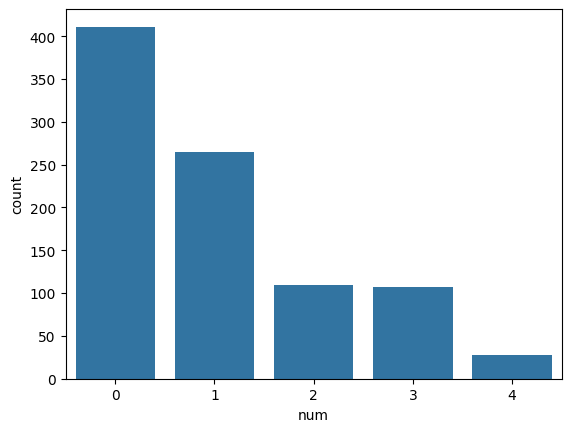

In [7]:
# Mostra a quantidade de pacientes em cada diagnóstico
ax=sns.countplot(x="num", data=dataset)

##**3. Preparação de Dados**

Iniciaremos a preparação dos dados com a separação do dataset em treino e teste.

In [8]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = dataset.values
X = array[:,0:13] # atributos
y = array[:,13] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

# Checando as dimensões
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Checando tipo do dado
print(type(X_train))

(736, 13) (736,) (184, 13) (184,)
<class 'numpy.ndarray'>


Refinaremos a quantidade de atributos através da feature selection utilizando a eliminação recursiva de atributos. Selecionaremos 7 atributos reduzindo o dataset pela metade.

In [9]:
# Eliminação Recursiva de Atributos

# Criação do modelo
modelo = LogisticRegression(max_iter=200)

# Eliminação Recursiva de Atributos
rfe = RFE(modelo, n_features_to_select=7)
fit = rfe.fit(X, y)

# Print dos resultados
print("Atributos Originais:", dataset.columns[0:13])

# Exibe os atributos selecionados (marcados como True em "Atributos Selecionados"
# e com valor 1 em "Ranking dos Atributos")
print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)
print("\nNomes dos Atributos Selecionados: %s" % fit.get_feature_names_out(input_features=dataset.columns[0:13]))

Atributos Originais: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

Atributos Selecionados: [False  True  True False False  True  True False  True  True False  True
 False]

Ranking de atributos: [4 1 1 6 7 1 1 5 1 1 2 1 3]

Qtd de melhores Atributos: 7

Nomes dos Atributos Selecionados: ['sex' 'cp' 'fbs' 'restecg' 'exang' 'oldpeak' 'ca']


Com os atributos selecionados salvaremos o dataset original e removeremos os atributos indesejados.

In [10]:
#Salvando o dataset_orig
dataset_orig = dataset
#Removendo os atributos e exibindo o dataset refinado
dataset = dataset.drop(columns=['age', 'trestbps' , 'chol' , 'thalach' , 'slope' , 'thal'])
dataset.head()

,sex,cp,fbs,restecg,exang,oldpeak,ca,num
0,1.0,1.0,1.0,2.0,0.0,2.3,0.0,0
1,1.0,4.0,0.0,2.0,1.0,1.5,3.0,2
2,1.0,4.0,0.0,2.0,1.0,2.6,2.0,1
3,1.0,3.0,0.0,0.0,0.0,3.5,0.0,0
4,0.0,2.0,0.0,2.0,0.0,1.4,0.0,0


Faremos uma nova divisão de treino e teste utilizando o dataset refinado.

In [11]:
# Separação em bases de treino e teste (holdout)
array = dataset.values
X = array[:,0:7] # atributos
y = array[:,7] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

# Checando as dimensões
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Checando tipo do dado
print(type(X_train))

(736, 7) (736,) (184, 7) (184,)
<class 'numpy.ndarray'>


Mais adiante utilizaremos a normalização e padronização para comparação dos resultados dos algoritmos de machine learning.

##**4. Modelagem e Treinamento**

Agora seguiremos para a modelagem onde avaliaremos os modelos a partir das métricas de avaliação MSE e a RMSE. Serão criados os modelos com os seguintes algoritmos:

1. Regressão Linear (LR)

2. Regressão linear com regularização Ridge (Ridge)

3. Regressão linear com regularização Lasso (Lasso)

4. K-nearest neighbours (KNN)

5. Árvore de regressão (CART)

6. Support vector machine (SVM)

LR: MSE 0.85 (0.13) - RMSE 0.92
Ridge: MSE 0.85 (0.13) - RMSE 0.92
Lasso: MSE 1.27 (0.11) - RMSE 1.13
KNN: MSE 0.99 (0.18) - RMSE 0.99
CART: MSE 1.27 (0.26) - RMSE 1.13
SVM: MSE 0.91 (0.13) - RMSE 0.95


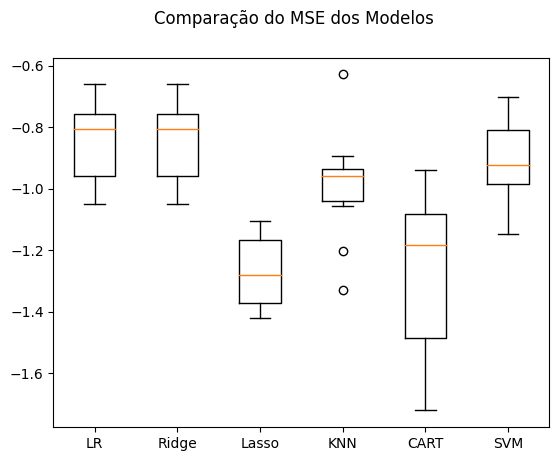

In [12]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results_pre = []
names_pre = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = 'neg_mean_squared_error')
  results_pre.append(cv_results)
  names_pre.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results_pre)
ax.set_xticklabels(names_pre)
plt.show()

Analisando os resultados dos modelos verificamos que os algoritmos de regressão linear e regressão linear com regularização ridge apresentaram os melhores resultados. A seguir faremos mais alguns testes com o dataset padronizado e normalizado.

LR-orig: MSE 0.85 (0.13) - RMSE 0.92
KNN-orig: MSE 1.37 (0.18) - RMSE 1.17
CART-orig: MSE 1.50 (0.24) - RMSE 1.23
Ridge-orig: MSE 0.85 (0.13) - RMSE 0.92
SVM-orig: MSE 0.91 (0.13) - RMSE 0.95
LR-padr: MSE 0.85 (0.13) - RMSE 0.92
KNN-padr: MSE 1.38 (0.18) - RMSE 1.18
CART-padr: MSE 1.49 (0.27) - RMSE 1.22
Ridge-padr: MSE 0.85 (0.13) - RMSE 0.92
SVM-padr: MSE 0.92 (0.13) - RMSE 0.96
LR-norm: MSE 0.85 (0.13) - RMSE 0.92
KNN-norm: MSE 1.42 (0.27) - RMSE 1.19
CART-norm: MSE 1.47 (0.27) - RMSE 1.21
Ridge-norm: MSE 0.85 (0.13) - RMSE 0.92
SVM-norm: MSE 0.91 (0.17) - RMSE 0.96


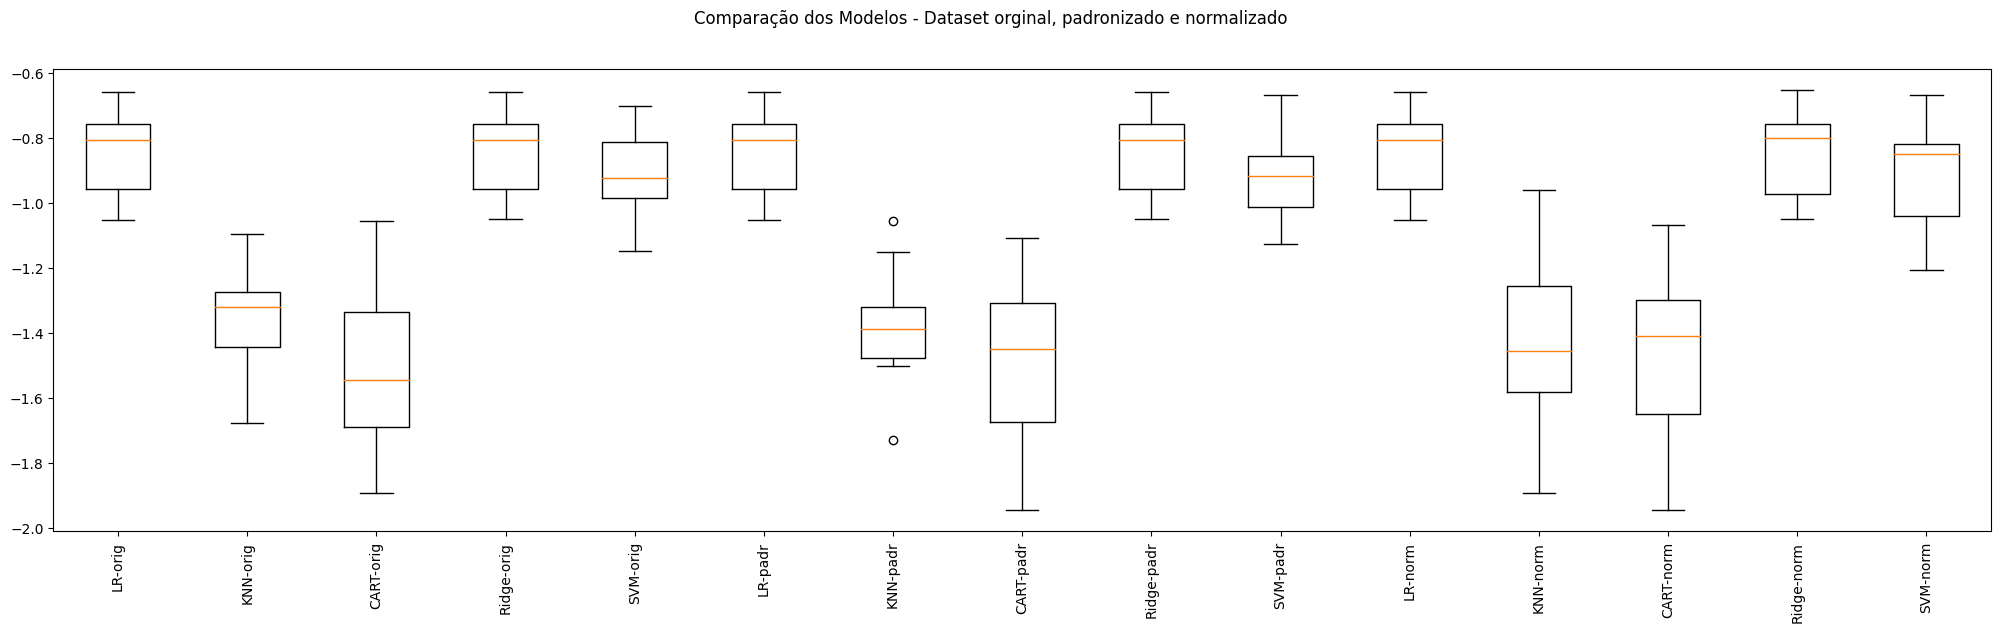

In [13]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
models = []
results = []
names = []
pipelines = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVR()))
models.append(('Ridge', Ridge()))

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
lr = ('LR', LinearRegression())
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
svm = ('SVM', SVR())
ridge = ('Ridge', Ridge())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([lr])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('Ridge-orig', Pipeline([ridge])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, lr])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('Ridge-padr', Pipeline([standard_scaler, ridge])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, lr])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('Ridge-norm', Pipeline([min_max_scaler, ridge])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
  cv_results = cross_val_score (model, X_train, y_train, cv=kfold, scoring = 'neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Com o resultado percebemos que apesar da influência da padronização e da normalização em alguns algoritmos, os algoritmos com melhores resultados continuaram sendo os mesmos. Isso mostra que não houve variação dos resultados nesses algoritmos mesmo utilizando a padronização e a normalização.

## 5. Avaliação de Resultados

Criaremos o modelo com todo o conjunto de treino e seguiremos testes com a base de teste para no final avaliar o resultado de cada modelo a partir das métricas de avaliação.

###*5.1. Regreção Linear*

In [14]:
# Criando um modelo com todo o conjunto de treino
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 1.00
RMSE 1.00


###*5.2. Regressão linear com regularização Ridge*

In [15]:
# Criando um modelo com todo o conjunto de treino
model = Ridge()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 1.00
RMSE 1.00


###*5.3. K-Nearest Neighbours*

In [16]:
# Criando um modelo com todo o conjunto de treino
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 1.79
RMSE 1.34


De todos os algoritmos testados o melhor resultado encontrado a partir das métricas de avaliação utilizadas foi o algoritimo de Regressão Linear e Regressão linear com regularização Ridge. Como os valores de MSE e RMSE se aproximaram mais do zero nestes algoritmos, e não sendo observado problema de overfitting, fica evidenciado que os algoritmos citados apresentaram melhor desempenho neste caso que os outros testados.